<a href="https://colab.research.google.com/github/tonpiplaifa/KKU_data_mining/blob/master/Project_Div.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# แหล่งข้อมูล
1. สถิติการจดทะเบียนหย่า ในปี 2553 - ปี 2555
จาก : http://service.nso.go.th/nso/web/statseries/statseries02.html?fbclid=IwAR0DNstitzDLu9CVyP_bf5nxYorcLqdqrVUdjEHwjSx9012o35Zim3guI8s

2. รายได้เฉลี่ยต่อเดือนต่อครัวเรือน ค่าใช้จ่ายเฉลี่ยต่อเดือนต่อครัวเรือน 
จำนวนหนี้สินโดยเฉลี่ยต่อครัวเรือน จำแนกตามจังหวัด พ.ศ. 2553 - 2555
จาก :http://service.nso.go.th/nso/web/statseries/statseries11.html

# วัตถุประสงค์
เพื่อ



### ตารางข้อมูลทั้งหมด 4 ตาราง นั้นคือ 

1. รายได้เฉลี่ยต่อเดือนต่อครัวเรือน  จำแนกตามจังหวัด ในปี 2553 - ปี 2555
> มี 2 attibute คือ จังหวัด และ avg_income
2. ค่าใช้จ่ายเฉลี่ยต่อเดือนต่อครัวเรือน  จำแนกตามจังหวัด ในปี 2553 - ปี 2555
> มี 2 attibute คือ จังหวัด และ avg_expenditure
3. จำนวนหนี้สินโดยเฉลี่ยต่อครัวเรือน จำแนกตามจังหวัด ในปี 2553 - ปี 2555
> มี 2 attibute คือ จังหวัด และ avg_debt
4. จำนวนคู่การจดทะเบียนหย่า จำแนกตามจังหวัด ในปี 2553 - ปี 2555
> มี 2 attibute คือ จังหวัด และ couple_div



### การเชื่อมไดร์ฟเพื่อดึงข้อมูลจากไดร์ฟ

In [ ]:
from google.colab import drive #เอาข้อมูลเข้า
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/DWDM_material' #สร้างตัวแปร path เพื่อมารับที่อยู่ของไฟล์

In [ ]:
import os #การนำเข้า os 
import pandas as pd #การนำเข้า pandas โดนตั้งชื่อให้ว่า pd 

### ข้อมูลตารางที่ 1 จำนวนหนี้สินโดยเฉลี่ยต่อครัวเรือน จำแนกตามจังหวัด พ.ศ.2553-2555
ซึ่งมีคอลัม จังหวัด และ จำนวนหนี้สินโดยเฉลี่ย

In [ ]:
avg_Debt_1 = os.path.join(path,'avg_Debt_1.csv') #การกำหนดตัวแปรเพื่อมารับข้อมูลในไฟล์ avg_Debt_1.csv

In [ ]:
avg_Debt_1 = pd.read_csv(avg_Debt_1) #อ่านข้อมูล
avg_Debt_1

,จังหวัด,avg_debt
0,กรุงเทพมหานคร 53,207665.0
1,สมุทรปราการ 53,117360.8
2,นนทบุรี 53,240769.0
3,ปทุมธานี 53,220761.2
4,พระนครศรีอยุธยา 53,163424.5
...,...,...
226,ตรัง 55,160207.0
227,พัทลุง 55,162248.7
228,ปัตตานี 55,109102.5
229,ยะลา 55,35828.9


In [ ]:
avg_Debt_1.shape #ได้ว่าข้อมูลนี้มี 231 แถว 2 คอลัม

(231, 2)

In [ ]:
avg_Debt_1.isnull().any() #เชคว่าภายในตารางมีค่าว่างหรือไม่ จากผลจะเห็นได้ว่าคอลัม avg_debt มีค่าว่างอยู่

จังหวัด     False
avg_debt     True
dtype: bool

In [ ]:
avg_Debt_1[['avg_debt']] = avg_Debt_1[['avg_debt']].fillna(0) #แก้ไข missing valua โดยการเติม 0 ลงในช่องที่ว่าง

In [ ]:
avg_Debt_1.isnull().any() #ตรวจสอบค่าว่างอีกรอบ พบว่าไม่มีค่าว่างอยู่แล้ว

จังหวัด     False
avg_debt    False
dtype: bool

In [ ]:
avg_Debt_1 = avg_Debt_1.sort_values('avg_debt') 

In [ ]:
avg_Debt_1

,จังหวัด,avg_debt
128,บึงกาฬ 54,0.0
51,บึงกาฬ 53,0.0
100,สมุทรสงคราม 54,9244.0
177,สมุทรสงคราม 55,9857.2
75,ยะลา 53,18901.5
...,...,...
156,นนทบุรี 55,260752.2
162,ชัยนาท 55,264144.0
154,กรุงเทพมหานคร 55,275576.8
5,อ่างทอง 53,309493.7


In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.cluster import KMeans #นำเข้าฟังก์ชัน kmeans เพื่อใช้ในการจัดกลุ่ม

In [ ]:
X = avg_Debt_1[['avg_debt']] #ให้ตัวแปร X เป็นตัวแปรที่แทนคอลัม avg_dept ในตาราง avg_Debt_1

In [ ]:
from sklearn.datasets import make_blobs #make_blobs คือ สุ่มเดต้าขึ้นมาเป็นกลุ่มๆ

In [ ]:
X,y=make_blobs(n_samples=231, centers=4, n_features=2, random_state=6)  #231 แถว 2 หลัก จากที่กำหนด n_samples=231 และ n_features=2 จะแบ่งเป็น 4 กลุ่ม ตาม centers=4

In [ ]:
X.shape 

(231, 2)

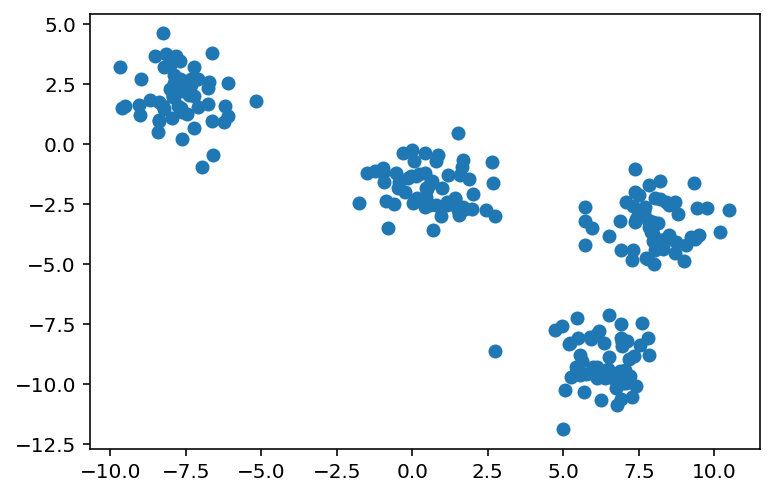

In [ ]:
from matplotlib import pyplot as plt #นำเข้า pyplot โดยตั้งชื่อว่า plt นำมาเพื่อพล็อตกราฟ
plt.scatter(X[:,0],X[:,1]) #จะแบ่งเป็น 4 กลุ่ม ตาม centers=4

In [ ]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่ม 2 กลุ่ม

In [ ]:
KMclust.fit(X) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
label=KMclust.predict(X) # predict ว่าอยู่ในกลุ่มไหน

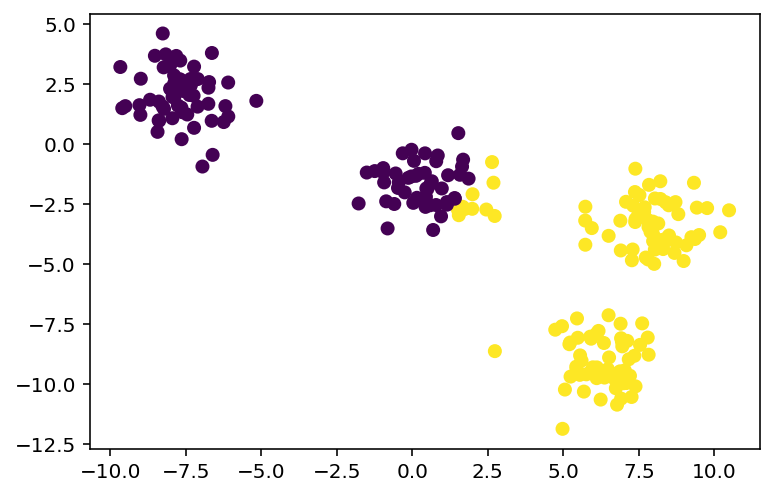

In [ ]:
plt.scatter(X[:,0], X[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

In [ ]:
n_krachuk = 2 # จำนวนกระจุก
n_thamsam = 100 # จำนวนทำซ้ำสูงสุด
tol = 0.0001 # ค่าความเปลี่ยนแปลงสูงสุดที่ยอมให้หยุดได้
sumlueak = np.random.choice(len(X),n_krachuk,replace=0)
X_cen = X[sumlueak] # จุดเซนทรอยด์ตั้งต้น เลือกแบบสุ่ม
# วนซ้ำเพื่อปรับเซนทรอยด์
for i in range(n_thamsam):
    raya2 = ((X_cen[None]-X[:,None])**2).sum(2) # วัดระยะห่างจากจุดถึงเซนทรอยด์
    klum = raya2.argmin(1) # ตัดสินกลุ่มของจุดโดยเลือกเซนทรอยด์ที่ใกล้สุด
    X_cen_mai = np.empty_like(X_cen) # จุดเซนทรอยด์ใหม่
    # วนซ้ำเพื่อหาตำแหน่งเซนทรอยด์ใหม่
    for j in range(n_krachuk):
        if(len(X[klum==j])): # ถ้ามีสมาชิกในกลุ่ม
            X_cen_mai[j] = X[klum==j].mean(0) # กำหนดเซนทรอยด์ใหม่เป็นตำแหน่งเฉลี่ยของทุกจุดในกลุ่ม
        else: # ถ้าในกลุ่มว่างเปล่าก็ให้สุ่มเซนทรอยด์ใหม่
            X_cen_mai[j] = X[np.random.randint(len(X))]
    if(np.allclose(X_cen,X_cen_mai,atol=tol)): # ถ้าความเปลี่ยนแปลงน้อยกว่าค่าที่กำหนดก็ให้หยุด
       X_cen = X_cen_mai
        break
    X_cen = X_cen_mai # ย้ายจุดเซนทรอยด์ไปยังตำแหน่งใหม่

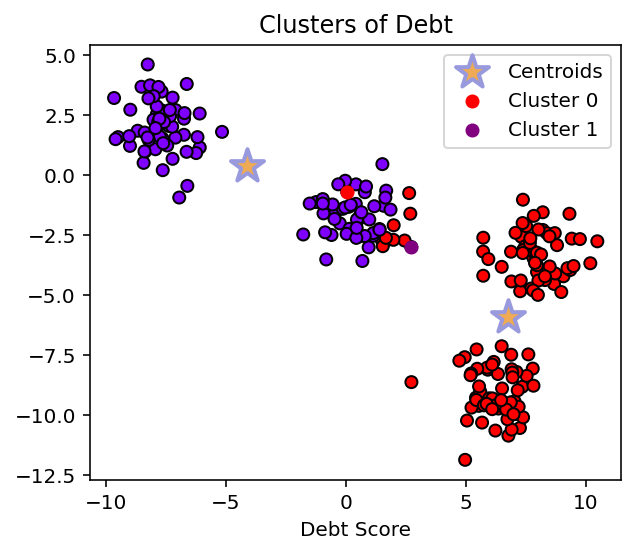

In [ ]:
raya2 = ((X_cen[None]-X[:,None])**2).sum(2)
z = raya2.argmin(1)
plt.gca(aspect=1)
plt.scatter(X[:,0],X[:,1],c=z,edgecolor='k',cmap='rainbow')
plt.scatter(X_cen[:,0],X_cen[:,1],300,'#EEAA55',marker='*',edgecolor='#9999DD',lw=2, label = 'Centroids')
plt.scatter(X[0,0], X[0,1], c = 'red', label = 'Cluster 0')
plt.scatter(X[1,0], X[1,1], c = 'purple', label = 'Cluster 1')
plt.title('Clusters of Debt')
plt.xlabel('Debt Score')
plt.legend()
plt.show()
#คือการกำหนดหัวเรื่องเพื่อให้มองชัดขึ้นว่าเรื่องนี้เป็นเรื่องอะไร และมีการกำหนดว่า สีที่ปรากฏหมายถึงค่าของอะไร รวมถึงการทำการกำหนดจุดcentriodด้วย

In [ ]:
sse = 0
for i in range(n_krachuk):
    sse += np.sum(raya2[z==i,i])
print(sse) #พิจารณาผลรวมของระยะห่างระหว่างจุดข้อมูลไปยังเซนทรอยด์นั้นๆ ซึ่งเรียกว่าผลรวมความคลาดเคลื่อนกำลังสอง (sum of squared errors, SSE)

3808.0250830862615


In [ ]:
KMclust.cluster_centers_  #คือตำแหน่งของจุดเซนทรอยด์ที่ได้มา จะมีขนาดเท่ากับ (จำนวนเซนทรอยด์,จำนวนมิติ)

array([[-4.12560165,  0.37783701],
       [ 6.75152364, -5.91936113]])

In [ ]:
KMclust.transform(X) # ระยะห่างของแต่ละจุดกับ centroid

array([[ 4.31770556,  8.49095676],
       [ 7.63892636,  4.97360404],
       [12.62594023,  3.91671774],
       [ 5.5094632 , 17.90170884],
       [15.77802464,  4.6527848 ],
       [14.71336771,  2.96883283],
       [ 3.69458891,  9.19817054],
       [12.03312064,  1.49391986],
       [14.60823379,  2.38708757],
       [13.15386759,  2.34635993],
       [12.82029252,  3.86154095],
       [ 6.44688194,  6.12395059],
       [12.54525894,  2.68986547],
       [ 5.14272332,  7.44873202],
       [13.07926073,  2.27742269],
       [ 3.25016402,  9.32271204],
       [12.90915607,  1.54118436],
       [ 6.10430737,  6.48822855],
       [ 7.0969365 ,  5.92482191],
       [ 4.29586678, 16.62813951],
       [ 4.33607622, 16.90455017],
       [15.03105507,  3.73372196],
       [ 6.01828981,  6.55282137],
       [ 2.94756218, 15.39899388],
       [ 2.11439537, 14.66280001],
       [14.86276077,  3.5280767 ],
       [13.09134814,  2.40808921],
       [11.32431572,  4.84740601],
       [11.81511832,

In [ ]:
KMclust.labels_ #ผลการแบ่งกลุ่มของข้อมูลที่ใช้เรียนรู้

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int32)

In [ ]:
ssd=[]
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(X)
    ssd.append([k, m.inertia_])
ssd #สร้าง ssd เป็นเซตว่าง แล้วกำหนดค่า k ตั้งแต่ 2 ถึง 10 จากนั้นทำการวนลูป for เพื่อหาค่า k means ของแต่ละ k 
#จากผลสรุปได้ว่าตารางนี้ควรจัดกลุ่มเป็น 2 กลุ่ม เนื่องจากมีค่า k means สูงที่สุด

[[2, 3808.025083086262],
 [3, 1472.7397344707779],
 [4, 434.8621723093945],
 [5, 387.08764317414074],
 [6, 344.96405571939704],
 [7, 305.7803117591529],
 [8, 268.5420293648537],
 [9, 246.1628037071689]]

In [ ]:
xy=np.array(ssd)
print(xy)

[[2.00000000e+00 3.80802508e+03]
 [3.00000000e+00 1.47273973e+03]
 [4.00000000e+00 4.34862172e+02]
 [5.00000000e+00 3.87087643e+02]
 [6.00000000e+00 3.44964056e+02]
 [7.00000000e+00 3.05780312e+02]
 [8.00000000e+00 2.68542029e+02]
 [9.00000000e+00 2.46162804e+02]]


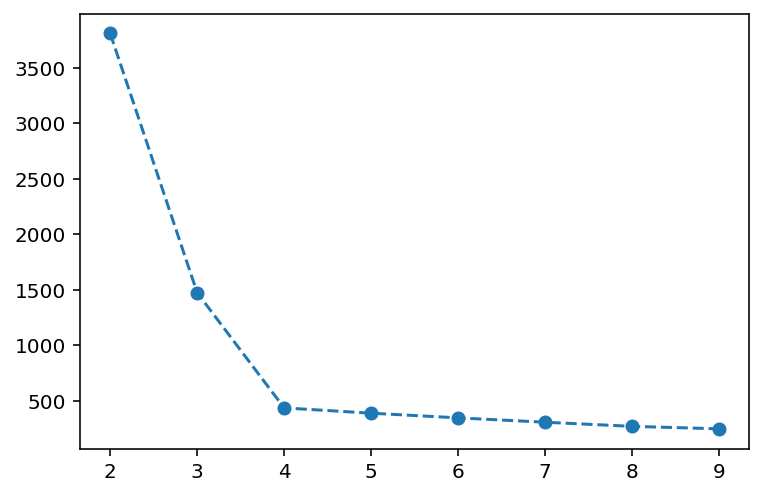

In [ ]:
plt.plot(xy[:, 0], xy[:, 1], linestyle='--', marker='o') 

In [ ]:
dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
dd

,k,ssd
0,2,3808.025083
1,3,1472.739734
2,4,434.862172
3,5,387.087643
4,6,344.964056
5,7,305.780312
6,8,268.542029
7,9,246.162804


In [ ]:
dd['pct_chg']=dd['ssd'].pct_change() * 100
dd

,k,ssd,pct_chg
0,2,3808.025083,NaN
1,3,1472.739734,-61.325367
2,4,434.862172,-70.472571
3,5,387.087643,-10.986131
4,6,344.964056,-10.882183
5,7,305.780312,-11.358790
6,8,268.542029,-12.178116
7,9,246.162804,-8.333603


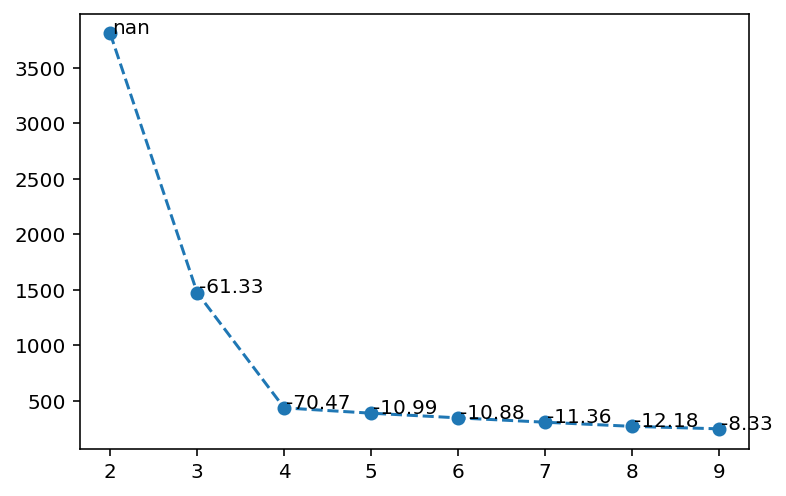

In [ ]:
plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
for index, row in dd.iterrows():
    plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10) 

>นำกลุ่มที่จัดการมาเพิ่มคอลัมในตาราง โดยกลุ่ม 0 คือมีหนี้สินเฉลี่ยมาก 1 คือมีหนี้สินเฉลี่ยน้อย

In [ ]:
avg_Debt_1['cluster']=KMclust.labels_  
avg_Debt_1.head() 

,จังหวัด,avg_debt,cluster
128,บึงกาฬ 54,0.0,0
51,บึงกาฬ 53,0.0,1
100,สมุทรสงคราม 54,9244.0,1
177,สมุทรสงคราม 55,9857.2,0
75,ยะลา 53,18901.5,1


In [ ]:
avg_Debt_1.groupby('cluster').describe().T #ดูรายละเอียดในตารางนี้

cluster                     0              1
avg_debt count     105.000000     126.000000
         mean   135100.795238  127873.622222
         std     56055.589968   57833.393507
         min         0.000000       0.000000
         25%     94392.400000   96679.250000
         50%    128176.800000  123814.450000
         75%    168945.800000  161435.650000
         max    309493.700000  386957.400000

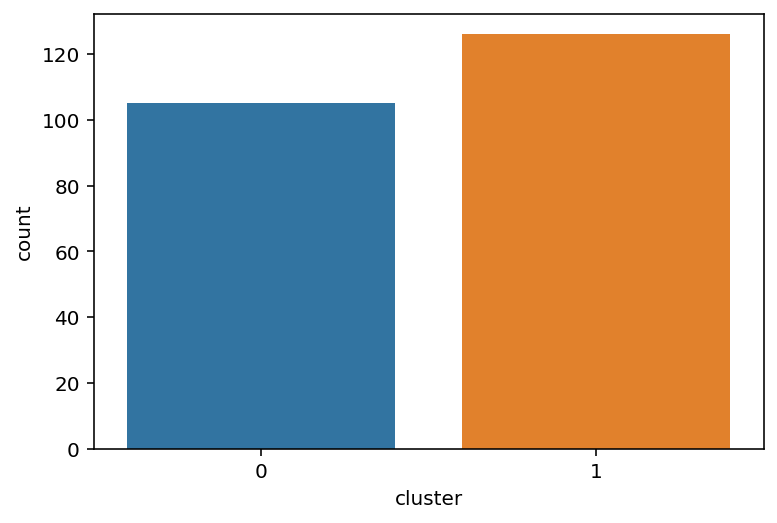

In [ ]:
sns.countplot(x='cluster', data=avg_Debt_1) #สร้างกราฟแท่งดูว่าแค่ละกลุ่มมีจำนวนเท่าไหร่ จากรูป

In [ ]:
avg_Debt_1

,จังหวัด,avg_debt,cluster
128,บึงกาฬ 54,0.0,0
51,บึงกาฬ 53,0.0,1
100,สมุทรสงคราม 54,9244.0,1
177,สมุทรสงคราม 55,9857.2,0
75,ยะลา 53,18901.5,1
...,...,...,...
156,นนทบุรี 55,260752.2,0
162,ชัยนาท 55,264144.0,1
154,กรุงเทพมหานคร 55,275576.8,1
5,อ่างทอง 53,309493.7,0


In [ ]:
avg_Debt_1.groupby('cluster').head().sort_values('cluster')

,จังหวัด,avg_debt,cluster
128,บึงกาฬ 54,0.0,0
177,สมุทรสงคราม 55,9857.2,0
23,สมุทรสงคราม 53,27061.0,0
111,แม่ฮ่องสอน 54,41957.3,0
230,นราธิวาส 55,44974.1,0
51,บึงกาฬ 53,0.0,1
100,สมุทรสงคราม 54,9244.0,1
75,ยะลา 53,18901.5,1
76,นราธิวาส 53,26246.4,1
34,แม่ฮ่องสอน 53,32562.0,1


In [ ]:
 avg_Debt_1.rename(columns={'cluster':'C_Debt'},inplace=True) #เปลี่ยนชื่อจากคอลัม cluster เป็น C_Debt

#การหย่าร้าง

In [ ]:
divorce_1 = os.path.join(path,'divorce_1.csv')

In [ ]:
divorce_1 = pd.read_csv(divorce_1)
divorce_1

,จังหวัด,couple_div
0,กรุงเทพมหานคร 53,16608.0
1,สมุทรปราการ 53,3683.0
2,นนทบุรี 53,2389.0
3,ปทุมธานี 53,2370.0
4,พระนครศรีอยุธยา 53,1981.0
...,...,...
226,ตรัง 55,742.0
227,พัทลุง 55,704.0
228,ปัตตานี 55,255.0
229,ยะลา 55,301.0


In [ ]:
divorce_1.shape

(231, 2)

In [ ]:
divorce_1.isnull().any()

จังหวัด       False
couple_div     True
dtype: bool

In [ ]:
divorce_1[['couple_div']] = divorce_1[['couple_div']].fillna(0) 

In [ ]:
divorce_1.isnull().any()

จังหวัด       False
couple_div    False
dtype: bool

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
Xd = divorce_1[['couple_div']] #Xd คือตัวแปรของการหย่า

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
Xd,y=make_blobs(n_samples=231, centers=2, n_features=2, random_state=6)

In [ ]:
Xd.shape 

(231, 2)

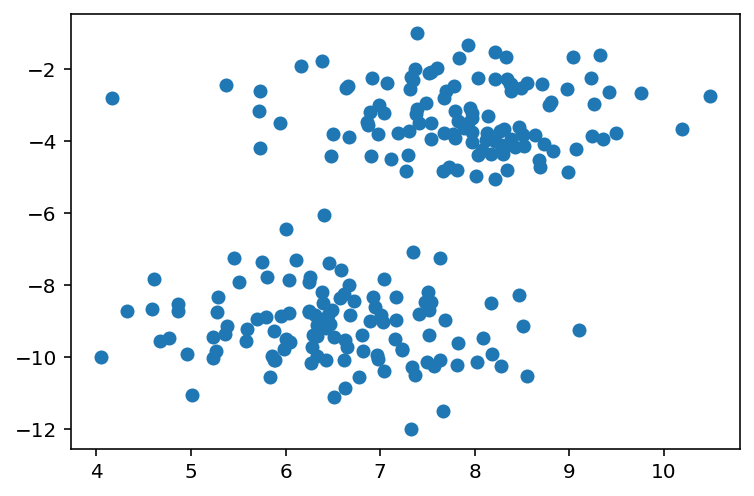

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(Xd[:,0],Xd[:,1]) #จะแบ่งเป็น 3 กลุ่ม ตาม centers=3

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่ม 2 กลุ่ม

In [ ]:
KMclust.fit(Xd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
label=KMclust.predict(Xd) # predict ว่าอยู่ในกลุ่มไหน

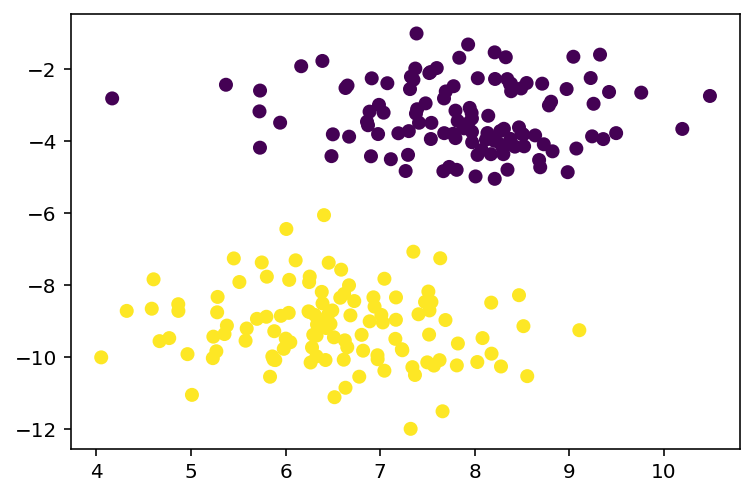

In [ ]:
plt.scatter(Xd[:,0], Xd[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

In [ ]:
n_krachukd = 2 # จำนวนกระจุก
n_thamsamd = 100 # จำนวนทำซ้ำสูงสุด
tol = 0.0001 # ค่าความเปลี่ยนแปลงสูงสุดที่ยอมให้หยุดได้
sumlueakd = np.random.choice(len(Xd),n_krachukd,replace=0)
X_cend = Xd[sumlueakd] # จุดเซนทรอยด์ตั้งต้น เลือกแบบสุ่ม
# วนซ้ำเพื่อปรับเซนทรอยด์
for i in range(n_thamsamd):
    raya2d = ((X_cend[None]-Xd[:,None])**2).sum(2) # วัดระยะห่างจากจุดถึงเซนทรอยด์
    klumd = raya2d.argmin(1) # ตัดสินกลุ่มของจุดโดยเลือกเซนทรอยด์ที่ใกล้สุด
    X_cen_maid = np.empty_like(X_cend) # จุดเซนทรอยด์ใหม่
    # วนซ้ำเพื่อหาตำแหน่งเซนทรอยด์ใหม่
    for j in range(n_krachukd):
        if(len(Xd[klumd==j])): # ถ้ามีสมาชิกในกลุ่ม
            X_cen_maid[j] = Xd[klumd==j].mean(0) # กำหนดเซนทรอยด์ใหม่เป็นตำแหน่งเฉลี่ยของทุกจุดในกลุ่ม
        else: # ถ้าในกลุ่มว่างเปล่าก็ให้สุ่มเซนทรอยด์ใหม่
            X_cen_maid[j] = Xd[np.random.randint(len(Xd))]
    if(np.allclose(X_cend,X_cen_maid,atol=tol)): # ถ้าความเปลี่ยนแปลงน้อยกว่าค่าที่กำหนดก็ให้หยุด
        X_cend = X_cen_maid
        break
    X_cend = X_cen_maid # ย้ายจุดเซนทรอยด์ไปยังตำแหน่งใหม่

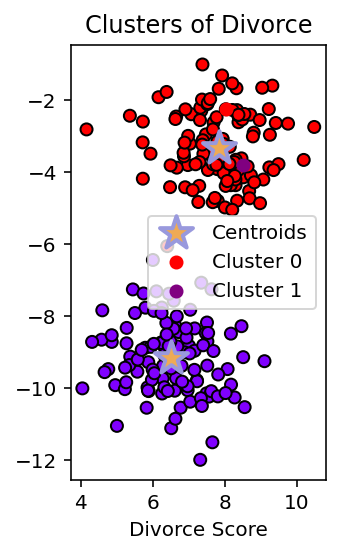

In [ ]:
raya2d = ((X_cend[None]-Xd[:,None])**2).sum(2)
zd = raya2d.argmin(1)
plt.gca(aspect=1)
plt.scatter(Xd[:,0],Xd[:,1],c=zd,edgecolor='k',cmap='rainbow')
plt.scatter(X_cend[:,0],X_cend[:,1],300,'#EEAA55',marker='*',edgecolor='#9999DD',lw=2, label = 'Centroids')
plt.scatter(Xd[0,0], Xd[0,1], c = 'red', label = 'Cluster 0')
plt.scatter(Xd[1,0], Xd[1,1], c = 'purple', label = 'Cluster 1')
plt.title('Clusters of Divorce')
plt.xlabel('Divorce Score')
plt.legend()
plt.show()

In [ ]:
ssed = 0
for i in range(n_krachukd):
    ssed += np.sum(raya2d[zd==i,i])
print(ssed)

444.60753115747195


In [ ]:
KMclust.cluster_centers_

array([[ 7.86420036, -3.31505689],
       [ 6.51694831, -9.14608415]])

In [ ]:
KMclust.transform(Xd) # the distance between each point and centroid

array([[1.0628428 , 7.04545571],
       [0.80509046, 5.69442235],
       [1.4953706 , 4.52530056],
       [0.61749075, 5.3719556 ],
       [7.92230742, 1.97609305],
       [7.25566579, 2.46897507],
       [7.51790467, 1.5640575 ],
       [0.83118897, 5.67637748],
       [6.89898383, 1.77844791],
       [5.97948876, 0.13301078],
       [1.68428055, 4.4132507 ],
       [5.58442409, 2.31044951],
       [2.34068033, 8.16862237],
       [7.31884954, 1.43142244],
       [1.02409631, 6.63577378],
       [0.8321378 , 5.94720331],
       [1.12949917, 6.88910157],
       [5.09267308, 0.89859105],
       [1.01718502, 5.3499416 ],
       [1.48935696, 5.92946213],
       [6.96973853, 1.06949771],
       [1.20340445, 6.76451799],
       [3.9564065 , 2.18899052],
       [6.84964947, 1.40812549],
       [8.70241559, 2.96625148],
       [5.94306159, 0.17659671],
       [1.02422735, 5.58637793],
       [6.2861287 , 0.32476599],
       [6.35029625, 0.4125503 ],
       [1.70006956, 6.12879628],
       [1.

In [ ]:
KMclust.labels_

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int32)

In [ ]:
ssdd=[] #ssdd เซ็ทว่างของการหย่า
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(Xd)
    ssdd.append([k, m.inertia_])
ssdd

[[2, 444.56672197993396],
 [3, 367.1821163825791],
 [4, 284.8506655741235],
 [5, 235.51023898026853],
 [6, 185.01371600799257],
 [7, 164.82948203524626],
 [8, 146.57903983487947],
 [9, 130.6899829583462]]

In [ ]:
xyd= np.array(ssdd) #ssdd เซ็ทว่างของการหย่า
print(xyd) #xyd ตัวแปรของ xy ของการหย่า

[[  2.         444.56672198]
 [  3.         367.18211638]
 [  4.         284.85066557]
 [  5.         235.51023898]
 [  6.         185.01371601]
 [  7.         164.82948204]
 [  8.         146.57903983]
 [  9.         130.68998296]]


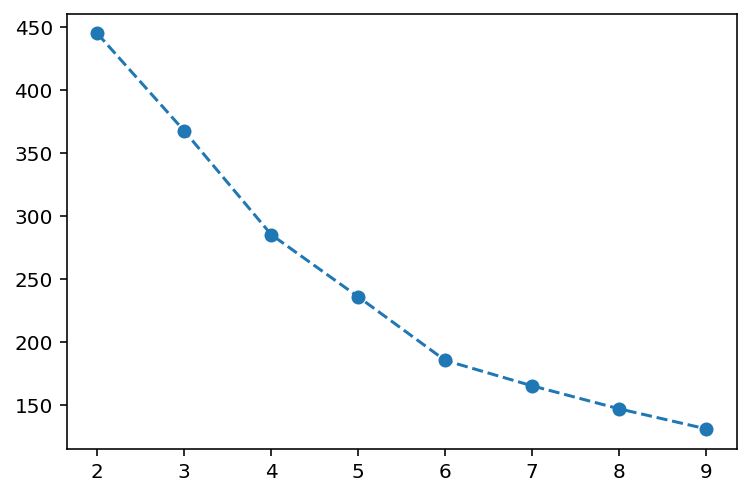

In [ ]:
plt.plot(xyd[:, 0], xyd[:, 1], linestyle='--', marker='o') #xyd ตัวแปรของ xy ของการหย่า


In [ ]:
ddd=pd.DataFrame(ssdd, columns=['k', 'ssdd']) #ddd ตัวแปรของการหย่า
ddd

,k,ssdd
0,2,444.566722
1,3,367.182116
2,4,284.850666
3,5,235.510239
4,6,185.013716
5,7,164.829482
6,8,146.579040
7,9,130.689983


In [ ]:
ddd['pct_chg']=ddd['ssdd'].pct_change() * 100
ddd

,k,ssdd,pct_chg
0,2,444.566722,NaN
1,3,367.182116,-17.406747
2,4,284.850666,-22.422511
3,5,235.510239,-17.321507
4,6,185.013716,-21.441328
5,7,164.829482,-10.909588
6,8,146.579040,-11.072317
7,9,130.689983,-10.839924


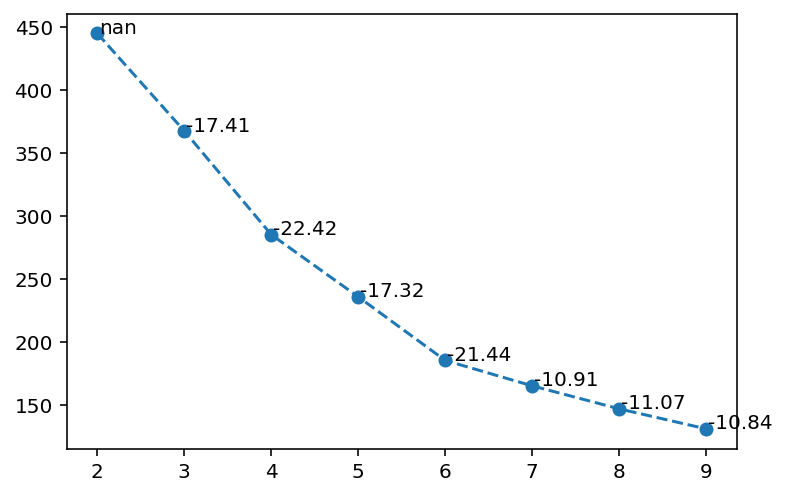

In [ ]:
plt.plot(ddd['k'], ddd['ssdd'], linestyle='--', marker='o')
for index, row in ddd.iterrows():
    plt.text(row['k']+.02, row['ssdd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

> นำเข้ากลุ่มที่จัดไว้โดยการเพิ่มที่คอลัม cluster โดยที่กลุ่ม 0 คือ จำนวนคู่หย่ามาก กลุ่ม 1 คือ จำนวนคู่หย่าน้อย

In [ ]:
divorce_1['cluster']=KMclust.labels_
divorce_1.head()

,จังหวัด,couple_div,cluster
0,กรุงเทพมหานคร 53,16608.0,0
1,สมุทรปราการ 53,3683.0,0
2,นนทบุรี 53,2389.0,0
3,ปทุมธานี 53,2370.0,0
4,พระนครศรีอยุธยา 53,1981.0,1


In [ ]:
divorce_1.groupby('cluster').describe().T

cluster                      0             1
couple_div count    115.000000    116.000000
           mean    1506.086957   1313.965517
           std     1772.915967   1975.580315
           min      134.000000      0.000000
           25%      715.000000    554.500000
           50%     1088.000000    962.500000
           75%     1711.000000   1459.000000
           max    16608.000000  15175.000000

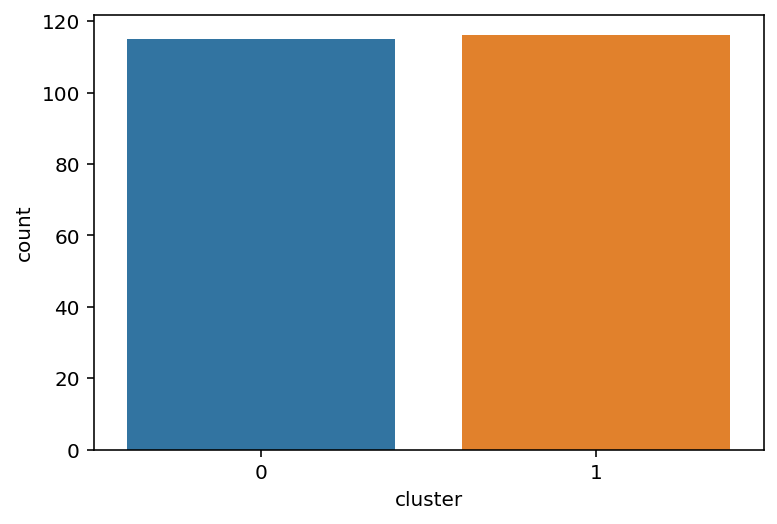

In [ ]:
sns.countplot(x='cluster', data=divorce_1)

In [ ]:
divorce_1

,จังหวัด,couple_div,cluster
0,กรุงเทพมหานคร 53,16608.0,0
1,สมุทรปราการ 53,3683.0,0
2,นนทบุรี 53,2389.0,0
3,ปทุมธานี 53,2370.0,0
4,พระนครศรีอยุธยา 53,1981.0,1
...,...,...,...
226,ตรัง 55,742.0,0
227,พัทลุง 55,704.0,1
228,ปัตตานี 55,255.0,0
229,ยะลา 55,301.0,1


In [ ]:
divorce_1.groupby('cluster').head().sort_values('cluster')

,จังหวัด,couple_div,cluster
0,กรุงเทพมหานคร 53,16608.0,0
1,สมุทรปราการ 53,3683.0,0
2,นนทบุรี 53,2389.0,0
3,ปทุมธานี 53,2370.0,0
7,สิงห์บุรี 53,409.0,0
4,พระนครศรีอยุธยา 53,1981.0,1
5,อ่างทอง 53,497.0,1
6,ลพบุรี 53,1394.0,1
8,ชัยนาท 53,474.0,1
9,สระบุรี 53,1618.0,1


In [ ]:
divorce_1.rename(columns={'cluster':'C_Divorce'},inplace=True)
divorce_1

,จังหวัด,couple_div,C_Divorce
0,กรุงเทพมหานคร 53,16608.0,0
1,สมุทรปราการ 53,3683.0,0
2,นนทบุรี 53,2389.0,0
3,ปทุมธานี 53,2370.0,0
4,พระนครศรีอยุธยา 53,1981.0,1
...,...,...,...
226,ตรัง 55,742.0,0
227,พัทลุง 55,704.0,1
228,ปัตตานี 55,255.0,0
229,ยะลา 55,301.0,1


#รายได้

In [ ]:
avg_Income_1 = os.path.join(path,'avg_Income_1.csv')

In [ ]:
avg_Income_1 = pd.read_csv(avg_Income_1)
avg_Income_1

,จังหวัด,avg_income
0,กรุงเทพมหานคร 53,42380.0
1,สมุทรปราการ 53,23359.0
2,นนทบุรี 53,34626.0
3,ปทุมธานี 53,26686.0
4,พระนครศรีอยุธยา 53,25820.0
...,...,...
226,ตรัง 55,33269.9
227,พัทลุง 55,26169.3
228,ปัตตานี 55,20199.1
229,ยะลา 55,22483.1


In [ ]:
avg_Income_1.shape

(231, 2)

In [ ]:
avg_Income_1.isnull().any()

จังหวัด       False
avg_income     True
dtype: bool

In [ ]:
avg_Income_1[['avg_income']] = avg_Income_1[['avg_income']].fillna(0) 

In [ ]:
avg_Income_1.isnull().any()

จังหวัด       False
avg_income    False
dtype: bool

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
Xi = avg_Income_1[['avg_income']] #Xi ตัวแปรของรายได้

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
Xi,y=make_blobs(n_samples=231, centers=3, n_features=2, random_state=6)

In [ ]:
Xi.shape 

(231, 2)

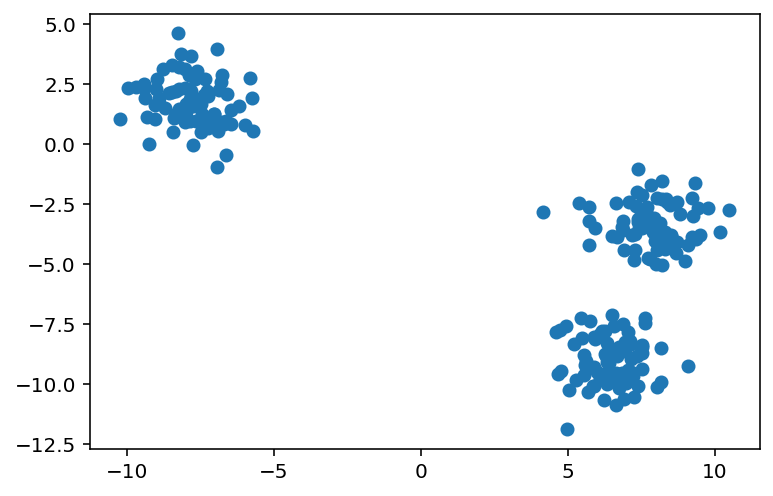

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(Xi[:,0],Xi[:,1]) #จะแบ่งเป็น 3 กลุ่ม ตาม centers=3

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่ม 2 กลุ่ม

In [ ]:
KMclust.fit(Xi)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
label=KMclust.predict(Xi) # predict ว่าอยู่ในกลุ่มไหน

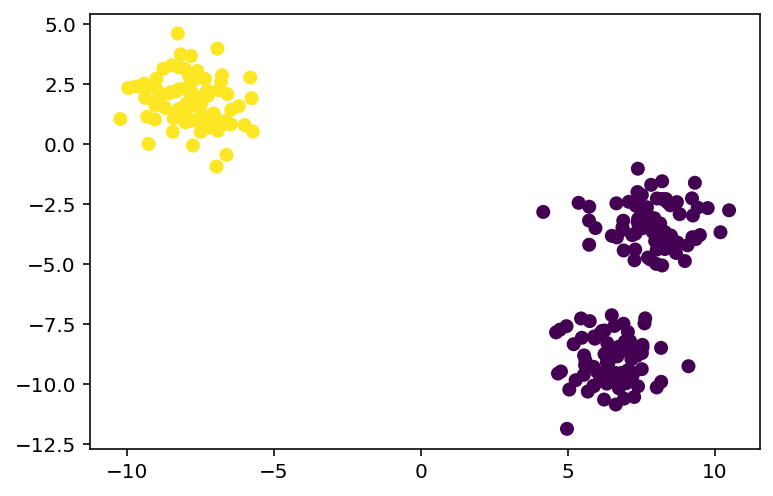

In [ ]:
plt.scatter(Xi[:,0], Xi[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

In [ ]:
n_krachuki = 2 # จำนวนกระจุก
n_thamsami = 100 # จำนวนทำซ้ำสูงสุด
tol = 0.0001 # ค่าความเปลี่ยนแปลงสูงสุดที่ยอมให้หยุดได้
sumlueaki = np.random.choice(len(Xi),n_krachuki,replace=0)
X_ceni = Xi[sumlueaki] # จุดเซนทรอยด์ตั้งต้น เลือกแบบสุ่ม
# วนซ้ำเพื่อปรับเซนทรอยด์
for i in range(n_thamsami):
    raya2i = ((X_ceni[None]-Xi[:,None])**2).sum(2) # วัดระยะห่างจากจุดถึงเซนทรอยด์
    klumi = raya2i.argmin(1) # ตัดสินกลุ่มของจุดโดยเลือกเซนทรอยด์ที่ใกล้สุด
    X_cen_maii = np.empty_like(X_ceni) # จุดเซนทรอยด์ใหม่
    # วนซ้ำเพื่อหาตำแหน่งเซนทรอยด์ใหม่
    for j in range(n_krachuki):
        if(len(Xi[klumi==j])): # ถ้ามีสมาชิกในกลุ่ม
            X_cen_maii[j] = Xi[klumi==j].mean(0) # กำหนดเซนทรอยด์ใหม่เป็นตำแหน่งเฉลี่ยของทุกจุดในกลุ่ม
        else: # ถ้าในกลุ่มว่างเปล่าก็ให้สุ่มเซนทรอยด์ใหม่
            X_cen_maii[j] = Xi[np.random.randint(len(Xi))]
    if(np.allclose(X_ceni,X_cen_maii,atol=tol)): # ถ้าความเปลี่ยนแปลงน้อยกว่าค่าที่กำหนดก็ให้หยุด
        X_ceni = X_cen_maii
        break
    X_ceni = X_cen_maii # ย้ายจุดเซนทรอยด์ไปยังตำแหน่งใหม่

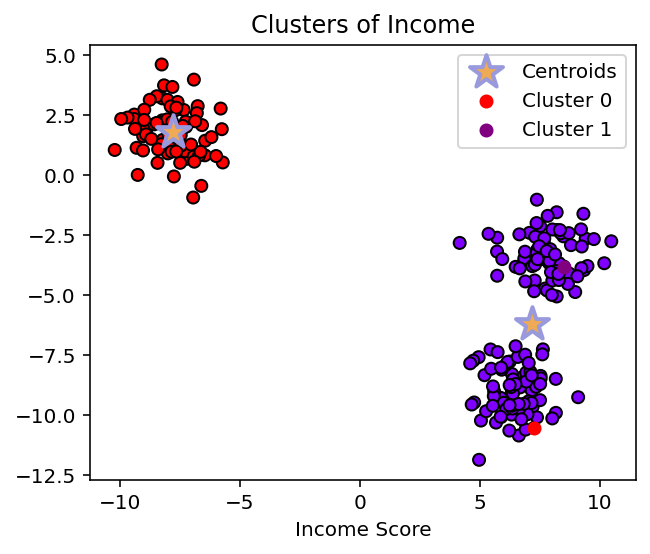

In [ ]:
raya2i = ((X_ceni[None]-Xi[:,None])**2).sum(2)
zi = raya2i.argmin(1)
plt.gca(aspect=1)
plt.scatter(Xi[:,0],Xi[:,1],c=zi,edgecolor='k',cmap='rainbow')
plt.scatter(X_ceni[:,0],X_ceni[:,1],300,'#EEAA55',marker='*',edgecolor='#9999DD',lw=2, label = 'Centroids')
plt.scatter(Xi[0,0], Xi[0,1], c = 'red', label = 'Cluster 0')
plt.scatter(Xi[1,0], Xi[1,1], c = 'purple', label = 'Cluster 1')
plt.title('Clusters of Income')
plt.xlabel('Income Score')
plt.legend()
plt.show()

In [ ]:
ssei = 0
for i in range(n_krachuki):
    ssei += np.sum(raya2i[zi==i,i])
print(ssei)

1751.9669425508212


In [ ]:
KMclust.cluster_centers_

array([[ 7.17049205, -6.18852947],
       [-7.79775007,  1.78610777]])

In [ ]:
KMclust.transform(Xi) # the distance between each point and centroid

array([[ 4.35657384, 19.46286796],
       [ 2.71215952, 17.25282908],
       [ 2.70884496, 16.22743323],
       [ 5.05983897, 17.45766143],
       [ 2.02897205, 16.04954075],
       [ 2.56177615, 16.71518607],
       [15.64664579,  1.34745187],
       [ 3.4711508 , 18.87195087],
       [16.62190693,  1.50652845],
       [ 2.7266152 , 17.23167107],
       [16.6160869 ,  0.34904234],
       [ 4.03944671, 16.52353791],
       [ 3.85827321, 14.22449676],
       [17.02789616,  0.19453677],
       [ 3.61896268, 18.53323763],
       [17.58481661,  0.66590015],
       [ 2.30713982, 17.77093305],
       [17.02693124,  1.03696265],
       [17.19176311,  0.52754238],
       [15.33005926,  1.64582881],
       [15.60783922,  1.39409006],
       [ 2.91852292, 16.48022043],
       [ 3.12708999, 18.0930437 ],
       [ 2.26100905, 17.36691817],
       [15.76940085,  2.22813124],
       [ 2.44106119, 17.36937133],
       [ 4.77217036, 18.84251956],
       [ 3.43700643, 18.43292038],
       [ 2.62046403,

In [ ]:
KMclust.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [ ]:
ssdi=[] #เซทว่างของรายได้
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(Xi) #Xi ตัวแปรของรายได้
    ssdi.append([k, m.inertia_])
ssdi

[[2, 1751.9669425508212],
 [3, 444.034965979045],
 [4, 380.2639248784881],
 [5, 327.29456680721944],
 [6, 274.71210455309915],
 [7, 242.63324770066436],
 [8, 209.76670250795235],
 [9, 187.05207744753739]]

In [ ]:
xyi=np.array(ssdi) #xyi ตัวแปร xy ของรายได้
print(xyi)

[[   2.         1751.96694255]
 [   3.          444.03496598]
 [   4.          380.26392488]
 [   5.          327.29456681]
 [   6.          274.71210455]
 [   7.          242.6332477 ]
 [   8.          209.76670251]
 [   9.          187.05207745]]


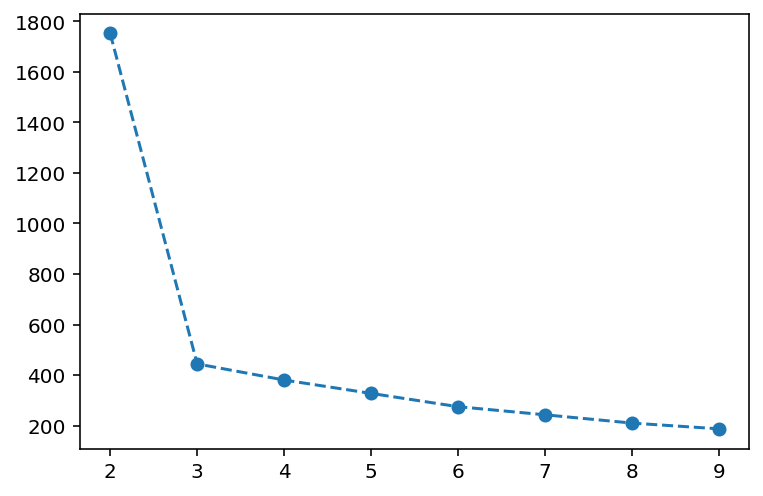

In [ ]:
plt.plot(xyi[:, 0], xyi[:, 1], linestyle='--', marker='o')

In [ ]:
ddi=pd.DataFrame(ssdi, columns=['k', 'ssdi']) 
ddi #ddi ตัวแปรของรายได้

,k,ssdi
0,2,1751.966943
1,3,444.034966
2,4,380.263925
3,5,327.294567
4,6,274.712105
5,7,242.633248
6,8,209.766703
7,9,187.052077


In [ ]:
ddi['pct_chg']=ddi['ssdi'].pct_change() * 100
ddi

,k,ssdi,pct_chg
0,2,1751.966943,NaN
1,3,444.034966,-74.655060
2,4,380.263925,-14.361716
3,5,327.294567,-13.929630
4,6,274.712105,-16.065791
5,7,242.633248,-11.677264
6,8,209.766703,-13.545771
7,9,187.052077,-10.828518


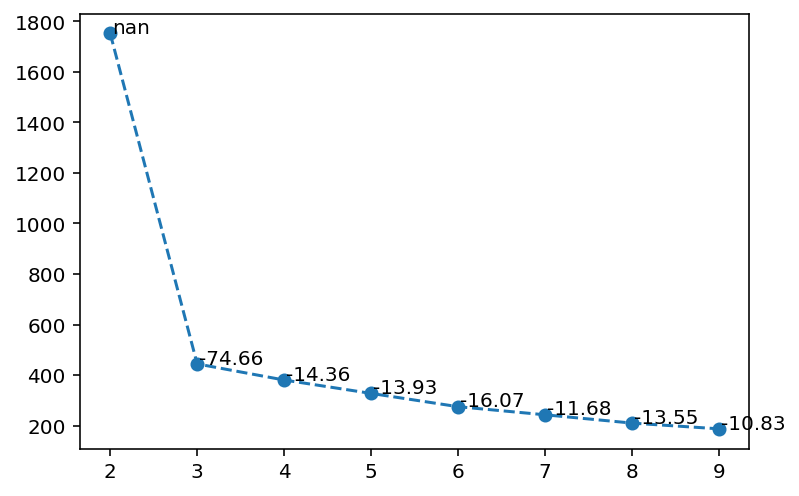

In [ ]:
plt.plot(ddi['k'], ddi['ssdi'], linestyle='--', marker='o')
for index, row in ddi.iterrows():
    plt.text(row['k']+.02, row['ssdi']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

> นำที่จัดกลุ่มไว้เข้ามาใส่ในตารางโดยเพิ่มใสคอลัม cluster โดยที่กลุ่ม 0 คือ รายได้เฉลี่ยมาก ,กลุ่ม 1 คือ รายได้เฉลี่ยน้อย

In [ ]:
avg_Income_1['cluster']=KMclust.labels_
avg_Income_1.head()

,จังหวัด,avg_income,cluster
0,กรุงเทพมหานคร 53,42380.0,0
1,สมุทรปราการ 53,23359.0,0
2,นนทบุรี 53,34626.0,0
3,ปทุมธานี 53,26686.0,0
4,พระนครศรีอยุธยา 53,25820.0,0


In [ ]:
avg_Income_1.groupby('cluster').describe().T

cluster                      0             1
avg_income count    154.000000     77.000000
           mean   21081.611688  20199.318182
           std     6998.588556   6127.008737
           min        0.000000      0.000000
           25%    16704.700000  16249.300000
           50%    19881.650000  19417.800000
           75%    24943.050000  22504.500000
           max    49190.800000  36245.200000

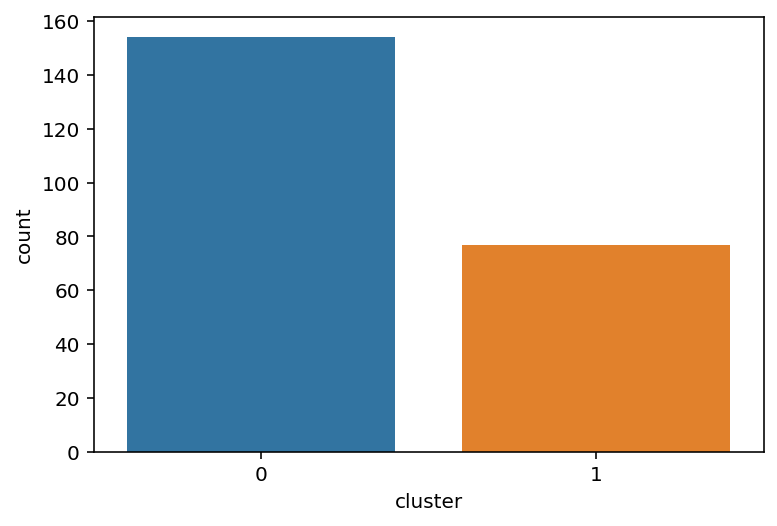

In [ ]:
sns.countplot(x='cluster', data=avg_Income_1)

In [ ]:
avg_Income_1

,จังหวัด,avg_income,cluster
0,กรุงเทพมหานคร 53,42380.0,0
1,สมุทรปราการ 53,23359.0,0
2,นนทบุรี 53,34626.0,0
3,ปทุมธานี 53,26686.0,0
4,พระนครศรีอยุธยา 53,25820.0,0
...,...,...,...
226,ตรัง 55,33269.9,1
227,พัทลุง 55,26169.3,0
228,ปัตตานี 55,20199.1,1
229,ยะลา 55,22483.1,1


In [ ]:
avg_Income_1.groupby('cluster').head().sort_values('cluster')

,จังหวัด,avg_income,cluster
0,กรุงเทพมหานคร 53,42380.0,0
1,สมุทรปราการ 53,23359.0,0
2,นนทบุรี 53,34626.0,0
3,ปทุมธานี 53,26686.0,0
4,พระนครศรีอยุธยา 53,25820.0,0
6,ลพบุรี 53,22405.0,1
8,ชัยนาท 53,18719.0,1
10,ชลบุรี 53,24052.0,1
13,ตราด 53,16949.0,1
15,ปราจีนบุรี 53,22548.0,1


In [ ]:
avg_Income_1.rename(columns={'cluster':'C_Income'},inplace=True)
avg_Income_1

,จังหวัด,avg_income,C_Income
0,กรุงเทพมหานคร 53,42380.0,0
1,สมุทรปราการ 53,23359.0,0
2,นนทบุรี 53,34626.0,0
3,ปทุมธานี 53,26686.0,0
4,พระนครศรีอยุธยา 53,25820.0,0
...,...,...,...
226,ตรัง 55,33269.9,1
227,พัทลุง 55,26169.3,0
228,ปัตตานี 55,20199.1,1
229,ยะลา 55,22483.1,1


#ค่าใช้จ่าย

In [ ]:
avg_Expenditure_1 = os.path.join(path,'avg_Expenditure_1.csv')

In [ ]:
avg_Expenditure_1 = pd.read_csv(avg_Expenditure_1)
avg_Expenditure_1

,จังหวัด,avg_expenditure
0,กรุงเทพมหานคร 53,30334.0
1,สมุทรปราการ 53,18450.0
2,นนทบุรี 53,29487.0
3,ปทุมธานี 53,22460.0
4,พระนครศรีอยุธยา 53,20717.0
...,...,...
226,ตรัง 55,20922.3
227,พัทลุง 55,16635.7
228,ปัตตานี 55,16668.1
229,ยะลา 55,12521.7


In [ ]:
avg_Expenditure_1.shape

(231, 2)

In [ ]:
avg_Expenditure_1.isnull().any()

จังหวัด            False
avg_expenditure     True
dtype: bool

In [ ]:
avg_Expenditure_1[['avg_expenditure']] = avg_Expenditure_1[['avg_expenditure']].fillna(0) 

In [ ]:
avg_Expenditure_1.isnull().any()

จังหวัด            False
avg_expenditure    False
dtype: bool

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
Xe = avg_Expenditure_1[['avg_expenditure']] #Xi ตัวแปรของค่าใช้จ่าย

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
Xe,y=make_blobs(n_samples=231, centers=4, n_features=2, random_state=6)

In [ ]:
Xe.shape 

(231, 2)

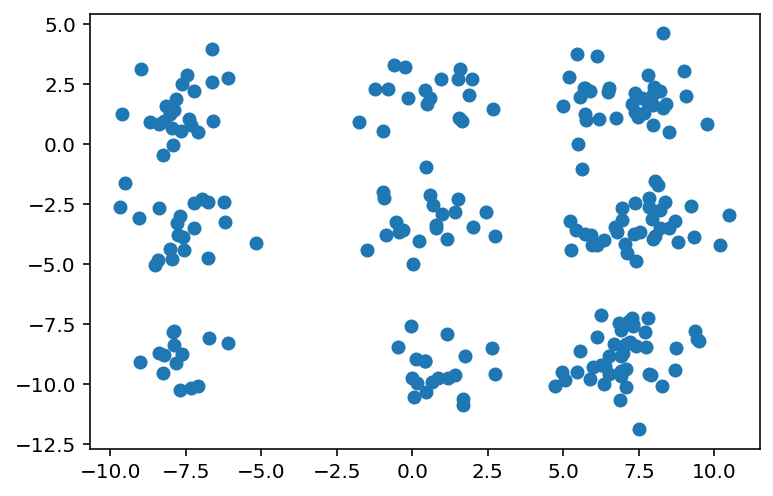

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(Xe[:,0],Xi[:,1]) #จะแบ่งเป็น 3 กลุ่ม ตาม centers=3

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่ม 2 กลุ่ม

In [ ]:
KMclust.fit(Xe)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
label=KMclust.predict(Xi) # predict ว่าอยู่ในกลุ่มไหน

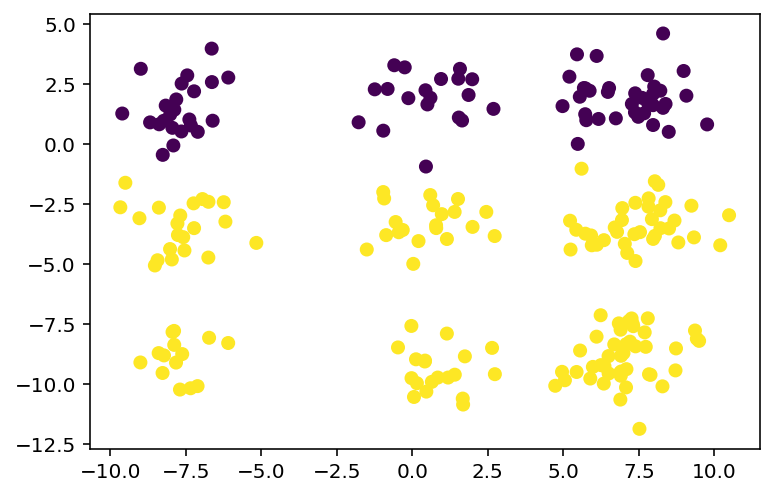

In [ ]:
plt.scatter(Xe[:,0], Xi[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

In [ ]:
n_krachuke = 2 # จำนวนกระจุก
n_thamsame = 100 # จำนวนทำซ้ำสูงสุด
tol = 0.0001 # ค่าความเปลี่ยนแปลงสูงสุดที่ยอมให้หยุดได้
sumlueake = np.random.choice(len(Xe),n_krachuke,replace=0)
X_cene = Xe[sumlueake] # จุดเซนทรอยด์ตั้งต้น เลือกแบบสุ่ม
# วนซ้ำเพื่อปรับเซนทรอยด์
for i in range(n_thamsame):
    raya2e = ((X_cene[None]-Xe[:,None])**2).sum(2) # วัดระยะห่างจากจุดถึงเซนทรอยด์
    klume = raya2e.argmin(1) # ตัดสินกลุ่มของจุดโดยเลือกเซนทรอยด์ที่ใกล้สุด
    X_cen_maie = np.empty_like(X_cene) # จุดเซนทรอยด์ใหม่
    # วนซ้ำเพื่อหาตำแหน่งเซนทรอยด์ใหม่
    for j in range(n_krachuke):
        if(len(Xe[klume==j])): # ถ้ามีสมาชิกในกลุ่ม
            X_cen_maie[j] = Xe[klume==j].mean(0) # กำหนดเซนทรอยด์ใหม่เป็นตำแหน่งเฉลี่ยของทุกจุดในกลุ่ม
        else: # ถ้าในกลุ่มว่างเปล่าก็ให้สุ่มเซนทรอยด์ใหม่
            X_cen_maie[j] = Xe[np.random.randint(len(Xe))]
    if(np.allclose(X_cene,X_cen_maie,atol=tol)): # ถ้าความเปลี่ยนแปลงน้อยกว่าค่าที่กำหนดก็ให้หยุด
        X_cene = X_cen_maie
        break
    X_cene = X_cen_maie # ย้ายจุดเซนทรอยด์ไปยังตำแหน่งใหม่

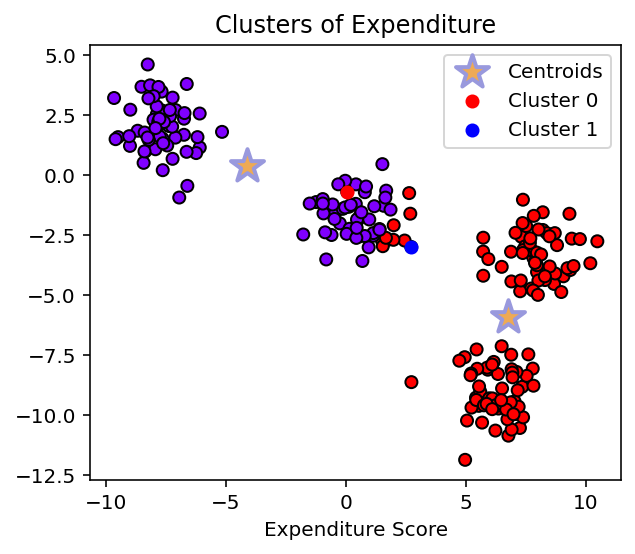

In [ ]:
raya2e = ((X_cene[None]-Xe[:,None])**2).sum(2)
ze = raya2e.argmin(1)
plt.gca(aspect=1)
plt.scatter(Xe[:,0],Xe[:,1],c=ze,edgecolor='k',cmap='rainbow')
plt.scatter(X_cene[:,0],X_cene[:,1],300,'#EEAA55',marker='*',edgecolor='#9999DD',lw=2, label = 'Centroids')
plt.scatter(Xe[0,0], Xe[0,1], c = 'red', label = 'Cluster 0')
plt.scatter(Xe[1,0], Xe[1,1], c = 'blue', label = 'Cluster 1')
plt.title('Clusters of Expenditure')
plt.xlabel('Expenditure Score')
plt.legend()
plt.show()

In [ ]:
ssee = 0
for i in range(n_krachuke):
    ssee += np.sum(raya2e[ze==i,i])
print(ssee)

3808.0250830862615


In [ ]:
KMclust.cluster_centers_

array([[-4.12560165,  0.37783701],
       [ 6.75152364, -5.91936113]])

In [ ]:
KMclust.transform(Xe) # the distance between each point and centroid

array([[ 4.31770556,  8.49095676],
       [ 7.63892636,  4.97360404],
       [12.62594023,  3.91671774],
       [ 5.5094632 , 17.90170884],
       [15.77802464,  4.6527848 ],
       [14.71336771,  2.96883283],
       [ 3.69458891,  9.19817054],
       [12.03312064,  1.49391986],
       [14.60823379,  2.38708757],
       [13.15386759,  2.34635993],
       [12.82029252,  3.86154095],
       [ 6.44688194,  6.12395059],
       [12.54525894,  2.68986547],
       [ 5.14272332,  7.44873202],
       [13.07926073,  2.27742269],
       [ 3.25016402,  9.32271204],
       [12.90915607,  1.54118436],
       [ 6.10430737,  6.48822855],
       [ 7.0969365 ,  5.92482191],
       [ 4.29586678, 16.62813951],
       [ 4.33607622, 16.90455017],
       [15.03105507,  3.73372196],
       [ 6.01828981,  6.55282137],
       [ 2.94756218, 15.39899388],
       [ 2.11439537, 14.66280001],
       [14.86276077,  3.5280767 ],
       [13.09134814,  2.40808921],
       [11.32431572,  4.84740601],
       [11.81511832,

In [ ]:
KMclust.labels_

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int32)

In [ ]:
ssde=[] #เซทว่างของรายได้
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(Xe) #Xi ตัวแปรของรายได้
    ssde.append([k, m.inertia_])
ssde

[[2, 3808.025083086262],
 [3, 1472.7397344707779],
 [4, 434.8621723093945],
 [5, 387.3177747333332],
 [6, 345.1967239602694],
 [7, 305.8306786100441],
 [8, 278.1409802335297],
 [9, 244.98026493225336]]

In [ ]:
xye=np.array(ssde) #xyi ตัวแปร xy ของรายได้
print(xye)

[[2.00000000e+00 3.80802508e+03]
 [3.00000000e+00 1.47273973e+03]
 [4.00000000e+00 4.34862172e+02]
 [5.00000000e+00 3.87317775e+02]
 [6.00000000e+00 3.45196724e+02]
 [7.00000000e+00 3.05830679e+02]
 [8.00000000e+00 2.78140980e+02]
 [9.00000000e+00 2.44980265e+02]]


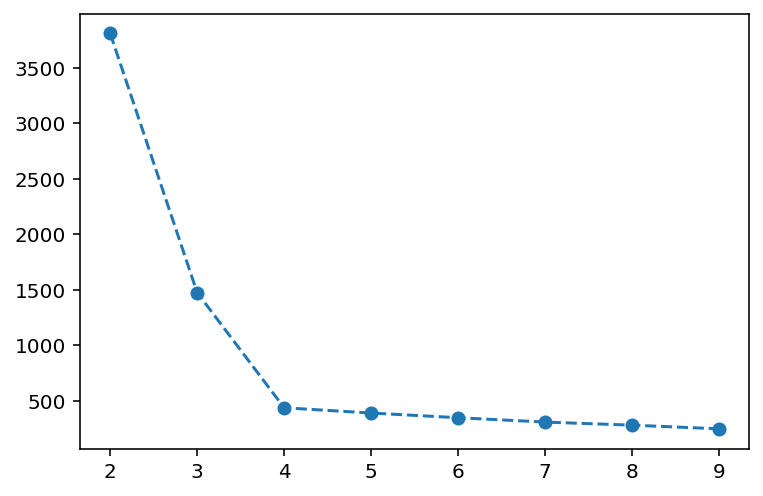

In [ ]:
plt.plot(xye[:, 0], xye[:, 1], linestyle='--', marker='o')

In [ ]:
dde=pd.DataFrame(ssde, columns=['k', 'ssde']) 
dde #ddi ตัวแปรของรายได้

,k,ssde
0,2,3808.025083
1,3,1472.739734
2,4,434.862172
3,5,387.317775
4,6,345.196724
5,7,305.830679
6,8,278.140980
7,9,244.980265


In [ ]:
dde['pct_chg']=dde['ssde'].pct_change() * 100
dde

,k,ssde,pct_chg
0,2,3808.025083,NaN
1,3,1472.739734,-61.325367
2,4,434.862172,-70.472571
3,5,387.317775,-10.933211
4,6,345.196724,-10.875063
5,7,305.830679,-11.403945
6,8,278.140980,-9.053931
7,9,244.980265,-11.922269


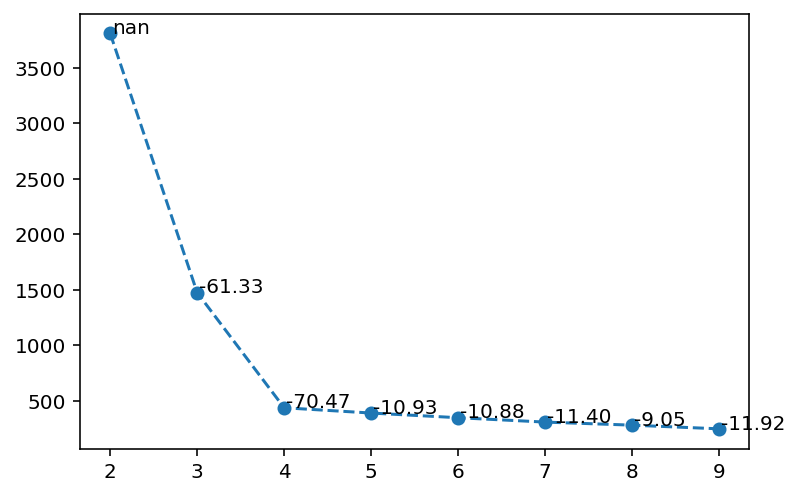

In [ ]:
plt.plot(dde['k'], dde['ssde'], linestyle='--', marker='o')
for index, row in dde.iterrows():
    plt.text(row['k']+.02, row['ssde']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

> นำกลุ่มจัดไว้มาเพิ่มในตารางที่คอลัม cluster โดยที่กลุ่ม 0 คือ ค่าใช้จ่ายเฉลี่ยมาก ,กลุ่ม 1 คือ ค่าใช้จ่ายเฉลี่ยน้อย

In [ ]:
avg_Expenditure_1['cluster']=KMclust.labels_
avg_Expenditure_1.head()

,จังหวัด,avg_expenditure,cluster
0,กรุงเทพมหานคร 53,30334.0,0
1,สมุทรปราการ 53,18450.0,1
2,นนทบุรี 53,29487.0,1
3,ปทุมธานี 53,22460.0,0
4,พระนครศรีอยุธยา 53,20717.0,1


In [ ]:
avg_Expenditure_1.groupby('cluster').describe().T

cluster                           0             1
avg_expenditure count    105.000000    126.000000
                mean   16471.426667  15988.019841
                std     5143.747580   4478.505207
                min        0.000000      0.000000
                25%    13148.800000  13249.150000
                50%    15347.500000  15558.650000
                75%    18993.200000  18464.550000
                max    35023.700000  29969.200000

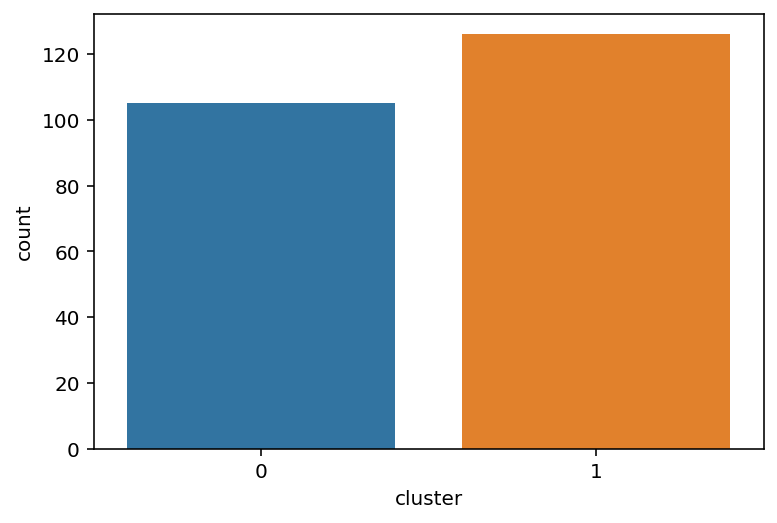

In [ ]:
sns.countplot(x='cluster', data=avg_Expenditure_1)

In [ ]:
avg_Expenditure_1

,จังหวัด,avg_expenditure,cluster
0,กรุงเทพมหานคร 53,30334.0,0
1,สมุทรปราการ 53,18450.0,1
2,นนทบุรี 53,29487.0,1
3,ปทุมธานี 53,22460.0,0
4,พระนครศรีอยุธยา 53,20717.0,1
...,...,...,...
226,ตรัง 55,20922.3,0
227,พัทลุง 55,16635.7,1
228,ปัตตานี 55,16668.1,1
229,ยะลา 55,12521.7,0


In [ ]:
avg_Expenditure_1.groupby('cluster').head().sort_values('cluster')

,จังหวัด,avg_expenditure,cluster
0,กรุงเทพมหานคร 53,30334.0,0
3,ปทุมธานี 53,22460.0,0
6,ลพบุรี 53,16764.0,0
13,ตราด 53,13365.0,0
15,ปราจีนบุรี 53,18472.0,0
1,สมุทรปราการ 53,18450.0,1
2,นนทบุรี 53,29487.0,1
4,พระนครศรีอยุธยา 53,20717.0,1
5,อ่างทอง 53,20773.0,1
7,สิงห์บุรี 53,17787.0,1


In [ ]:
avg_Expenditure_1.rename(columns={'cluster':'C_Expenditure'},inplace=True)
avg_Expenditure_1

,จังหวัด,avg_expenditure,C_Expenditure
0,กรุงเทพมหานคร 53,30334.0,0
1,สมุทรปราการ 53,18450.0,1
2,นนทบุรี 53,29487.0,1
3,ปทุมธานี 53,22460.0,0
4,พระนครศรีอยุธยา 53,20717.0,1
...,...,...,...
226,ตรัง 55,20922.3,0
227,พัทลุง 55,16635.7,1
228,ปัตตานี 55,16668.1,1
229,ยะลา 55,12521.7,0


#การรวมข้อมูล
จากการที่จัดกลุ่มในสี่ตารางแล้ว จึงทำการรวมตารางโดยใช้คีย์เป็นตัวเชื่อมคือจังหวัด

In [ ]:
New_table = avg_Debt_1.merge(avg_Income_1,how='left',left_on='จังหวัด',right_on='จังหวัด') #สร้างตัวแปร New_table มารับการรวมตารางของตาราง avg_Debt_1 กับ avg_Income_1 โดยการใช้คอลัมจังหวัดเป็นคีย์เชื่อมทั้งสองตาราง
New_table #โดยเริ่มคอลัมจากทางซ้าย 

,จังหวัด,avg_debt,C_Debt,avg_income,C_Income
0,บึงกาฬ 54,0.0,0,0.0,0
1,บึงกาฬ 53,0.0,1,0.0,1
2,สมุทรสงคราม 54,9244.0,1,15068.0,0
3,สมุทรสงคราม 55,9857.2,0,16256.5,0
4,ยะลา 53,18901.5,1,19619.0,1
...,...,...,...,...,...
226,นนทบุรี 55,260752.2,0,30663.6,1
227,ชัยนาท 55,264144.0,1,32753.5,0
228,กรุงเทพมหานคร 55,275576.8,1,49190.8,0
229,อ่างทอง 53,309493.7,0,25506.0,0


In [ ]:
NNew_table = New_table.merge(avg_Expenditure_1,how='left',left_on='จังหวัด',right_on='จังหวัด')  #สร้างตัวแปร NNew_table มารับการรวมตารางของตาราง New_table กับ avg_Expenditure_1 โดยการใช้คอลัมจังหวัดเป็นคีย์เชื่อมทั้งสองตาราง
NNew_table

,จังหวัด,avg_debt,C_Debt,avg_income,C_Income,avg_expenditure,C_Expenditure
0,บึงกาฬ 54,0.0,0,0.0,0,0.0,1
1,บึงกาฬ 53,0.0,1,0.0,1,0.0,0
2,สมุทรสงคราม 54,9244.0,1,15068.0,0,15600.7,1
3,สมุทรสงคราม 55,9857.2,0,16256.5,0,16557.8,1
4,ยะลา 53,18901.5,1,19619.0,1,10580.0,1
...,...,...,...,...,...,...,...
226,นนทบุรี 55,260752.2,0,30663.6,1,26946.6,1
227,ชัยนาท 55,264144.0,1,32753.5,0,17766.6,1
228,กรุงเทพมหานคร 55,275576.8,1,49190.8,0,35023.7,0
229,อ่างทอง 53,309493.7,0,25506.0,0,20773.0,1


In [ ]:
NNNew_table = NNew_table.merge(divorce_1,how='left',left_on='จังหวัด',right_on='จังหวัด') #สร้างตัวแปร NNNew_table มารับการรวมตารางของตาราง NNew_table กับ divorce_1 โดยการใช้คอลัมจังหวัดเป็นคีย์เชื่อมทั้งสองตาราง
NNNew_table

,จังหวัด,avg_debt,C_Debt,avg_income,C_Income,avg_expenditure,C_Expenditure,couple_div,C_Divorce
0,บึงกาฬ 54,0.0,0,0.0,0,0.0,1,424.0,0
1,บึงกาฬ 53,0.0,1,0.0,1,0.0,0,0.0,1
2,สมุทรสงคราม 54,9244.0,1,15068.0,0,15600.7,1,134.0,0
3,สมุทรสงคราม 55,9857.2,0,16256.5,0,16557.8,1,218.0,1
4,ยะลา 53,18901.5,1,19619.0,1,10580.0,1,299.0,1
...,...,...,...,...,...,...,...,...,...
226,นนทบุรี 55,260752.2,0,30663.6,1,26946.6,1,2189.0,1
227,ชัยนาท 55,264144.0,1,32753.5,0,17766.6,1,491.0,0
228,กรุงเทพมหานคร 55,275576.8,1,49190.8,0,35023.7,0,15130.0,1
229,อ่างทอง 53,309493.7,0,25506.0,0,20773.0,1,497.0,1


In [ ]:
X1 = NNNew_table #สร้างตัวแปร x1 รับข้อมูลในตาราง NNNew_table
X1

,จังหวัด,avg_debt,C_Debt,avg_income,C_Income,avg_expenditure,C_Expenditure,couple_div,C_Divorce
0,บึงกาฬ 54,0.0,0,0.0,0,0.0,1,424.0,0
1,บึงกาฬ 53,0.0,1,0.0,1,0.0,0,0.0,1
2,สมุทรสงคราม 54,9244.0,1,15068.0,0,15600.7,1,134.0,0
3,สมุทรสงคราม 55,9857.2,0,16256.5,0,16557.8,1,218.0,1
4,ยะลา 53,18901.5,1,19619.0,1,10580.0,1,299.0,1
...,...,...,...,...,...,...,...,...,...
226,นนทบุรี 55,260752.2,0,30663.6,1,26946.6,1,2189.0,1
227,ชัยนาท 55,264144.0,1,32753.5,0,17766.6,1,491.0,0
228,กรุงเทพมหานคร 55,275576.8,1,49190.8,0,35023.7,0,15130.0,1
229,อ่างทอง 53,309493.7,0,25506.0,0,20773.0,1,497.0,1


In [ ]:
Data = X1[['จังหวัด','C_Divorce','C_Debt','C_Income','C_Expenditure']]
Data #เลือกเฉพาะคอลัมที่ต้องการได้ดังนี้

,จังหวัด,C_Divorce,C_Debt,C_Income,C_Expenditure
0,บึงกาฬ 54,0,0,0,1
1,บึงกาฬ 53,1,1,1,0
2,สมุทรสงคราม 54,0,1,0,1
3,สมุทรสงคราม 55,1,0,0,1
4,ยะลา 53,1,1,1,1
...,...,...,...,...,...
226,นนทบุรี 55,1,0,1,1
227,ชัยนาท 55,0,1,0,1
228,กรุงเทพมหานคร 55,1,1,0,0
229,อ่างทอง 53,1,0,0,1


# KNN

In [ ]:
from sklearn.model_selection import train_test_split 

> โดยจะกำหนดแบ่ง train กับ test โดย test size = 0.2 

In [ ]:
X = Data.iloc[:,2:5] #กำหนดค่า X โดยให้เอาทุกแถว ตั้งแต่คอลัมที่ 2 ถึง 5
y = Data.iloc[:,1] #กำหนดค่า y โดยให้เอาทุกแถว เฉพาะคอลัมที่ 1
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1, stratify=y)


>**Import**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

>**Define** นิยามโมเดล

In [ ]:
myKNN=KNeighborsClassifier(n_neighbors=5) #n_neighbors คือ จำนวนเพื่อนบ้านที่จะพิจารณา

>**Train** เพื่อสร้างโมเดล

In [ ]:
myKNN.fit(X_train,y_train) #input มี2ตัว คือ X และ y

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

>**Test** ใช้คำสั่ง .predict โดยที่ข้อมูลมากจาก X_test

In [ ]:
myKNN.predict(X_test) #โดยใช้ predict ทำนายว่าตัวที่ใกล้สุด 3 ตัวแรก คือ 2

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

>ใช้คำสั่ง .predict_proba เป็นการคำนวณความน่าจะเป็นว่า ข้อมูลค่าใช้จ่าย รายได้ หนี้สินที่นำเข้าโมเดลนั้นจะอยู่กลุ่มไหนของการหย่ากี่เปอร์เซ็นต์

In [ ]:
myKNN.predict_proba(X_test)

array([[0.2, 0.8],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6]])

> ตรวจสอบความแม่นยำของโมเดล ว่าสามารถจำแจกกลุ่มการหย่า ว่าอยู่กลุ่มมาก กลุ่มน้อย ได้ที่ความแม่นยำกี่เปอร์เซ็นต์

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(myKNN, X_train, y_train, cv=2).mean()

0.483695652173913

###**สรุปได้ว่า** ค่าใช้จ่าย รายรับ หนี้สินโดยเฉลี่ย สามารถทำนายจำนวนคู่หย่าว่าแต่ละจังหวัดจัดอยู่ในกลุ่มมากหรือน้อยได้ ความแม่นยำ 66.30% 